<a href="https://colab.research.google.com/github/junghoum/vgames_analysis/blob/master/vgames_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 나눔 폰트 설치(한글 깨짐 방지)
# 설치 뒤 런타임 초기화 뒤 실행.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,801 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
# 본인의 데이터가 있는 드라이브로 변경

%cd /content/drive/MyDrive/vgames_analysis

/content/drive/MyDrive/vgames_analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('vgames2.csv')
# 데이터와 결측치 확인
df.shape, df.isna().sum()

((16598, 10), Unnamed: 0       0
 Name             0
 Platform         0
 Year           271
 Genre           50
 Publisher       58
 NA_Sales         0
 EU_Sales         0
 JP_Sales         0
 Other_Sales      0
 dtype: int64)

In [4]:
# 결측치 제거

df = df.dropna()

In [5]:
df.isna().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [6]:
# 연도, 장르, 플렛폼 개수

yc = df['Year'].unique()
yc = np.sort(yc)
gc = df['Genre'].unique()
pc = df['Platform'].unique()

nl = '\n'

print(f'{len(yc)}개(연도) : {yc} {nl}{nl}{len(gc)}개(장르) : {gc} {nl}{nl}{len(pc)}개(플렛폼) : {pc}')

62개(연도) : [0.000e+00 1.000e+00 2.000e+00 3.000e+00 4.000e+00 5.000e+00 6.000e+00
 7.000e+00 8.000e+00 9.000e+00 1.000e+01 1.100e+01 1.200e+01 1.300e+01
 1.400e+01 1.500e+01 1.600e+01 8.600e+01 9.400e+01 9.500e+01 9.600e+01
 9.700e+01 9.800e+01 1.980e+03 1.981e+03 1.982e+03 1.983e+03 1.984e+03
 1.985e+03 1.986e+03 1.987e+03 1.988e+03 1.989e+03 1.990e+03 1.991e+03
 1.992e+03 1.993e+03 1.994e+03 1.995e+03 1.996e+03 1.997e+03 1.998e+03
 1.999e+03 2.000e+03 2.001e+03 2.002e+03 2.003e+03 2.004e+03 2.005e+03
 2.006e+03 2.007e+03 2.008e+03 2.009e+03 2.010e+03 2.011e+03 2.012e+03
 2.013e+03 2.014e+03 2.015e+03 2.016e+03 2.017e+03 2.020e+03] 

12개(장르) : ['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter'] 

31개(플렛폼) : ['DS' 'Wii' 'PSP' 'PS3' 'PC' 'PS' 'GBA' 'PS4' 'PS2' 'XB' 'X360' 'GC' '3DS'
 '2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN' 'SCD'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [7]:
df.head(11)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [8]:
# 필요없는 열 제거

df.drop(['Unnamed: 0'], axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
# 데이터가 기본 M단위 기준이기에 K, M을 제거하고 K에 *0.001을 해줘서 단위를 맞춰준다.

NA = []
EU = []
JP = []
OT = []
def change_KM(x, h):
  for i in x:
    if 'K' in i:
      h.append(float(i.replace("K","")) * 0.001)
      
    elif 'M' in i:
      h.append(i.replace("M",""))
      
    else:
      h.append(i)

  return h


In [10]:
df['NA_Sales'] = change_KM(df["NA_Sales"], NA)
df['EU_Sales'] = change_KM(df["EU_Sales"], EU)
df['JP_Sales'] = change_KM(df["JP_Sales"], JP)
df['Other_Sales'] = change_KM(df["Other_Sales"], OT)

In [11]:
df.head(11)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [12]:
# 데이터 타입 object에서 float으로 변환

df = df.astype({'NA_Sales' : 'float'})
df = df.astype({'EU_Sales' : 'float'})
df = df.astype({'JP_Sales' : 'float'})
df = df.astype({'Other_Sales' : 'float'})
df = df.astype({'Year' : 'int'})

In [13]:
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [14]:
list(filter(lambda x: x < 1000, df['Year']))[:5]

[9, 97, 11, 15, 3]

In [15]:
# 1000년 전에 나온 게임이 없을 가능성이 큼으로 그 밑에 연도의 데이터는 23을 기준으로 낮으면 +2000, 높으면 +1900을 하여 정리

yc = []

for i in df['Year']:
  if i < 1000:
    if i < 23:
      yc.append(i + 2000)
    else:
      yc.append(i + 1900)
  else:
    yc.append(i)

df['Year'] = yc

In [16]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


Text(0.5, 1.0, '연도별 게임 판매량')

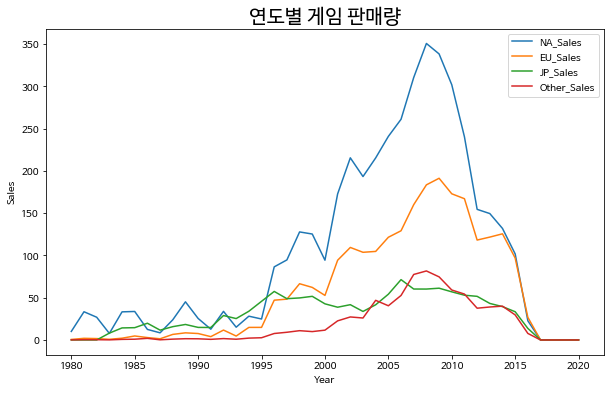

In [30]:
plt.rc('font', family='NanumBarunGothic') # 설치한 나눔 폰트 사용

yg = df.groupby('Year').sum()
yg.plot(figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('연도별 게임 판매량', size=20)

Text(0.5, 1.0, '장르별 게임 판매량')

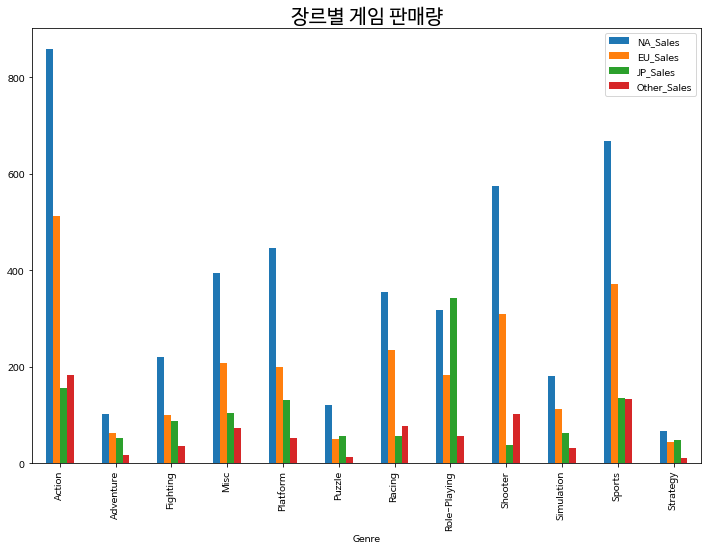

In [18]:
ag = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
a = ag.groupby('Genre').sum()
a.plot(kind='bar', figsize=(12, 8))
plt.title('장르별 게임 판매량', size=20)

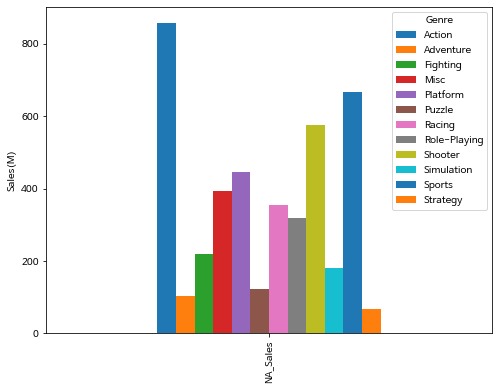

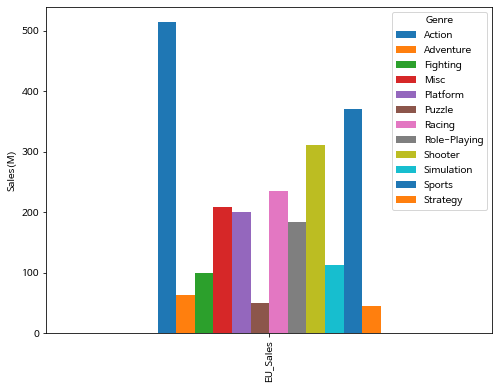

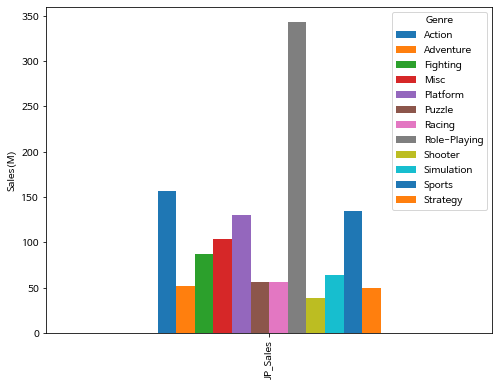

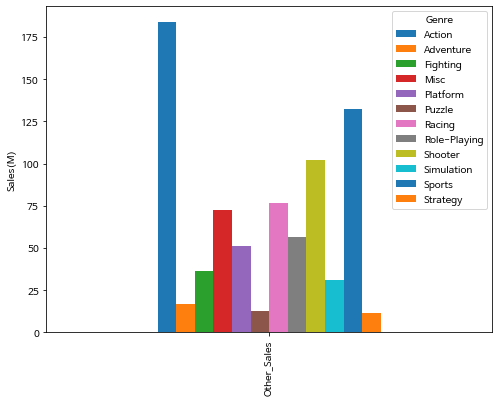

In [19]:
# 지역, 장르별 게임 판매량

def gg(x):
  for i in x:
    x = x.groupby('Genre').sum()
    x = x.T
    return x.plot(kind = 'bar', ylabel=('Sales(M)'),figsize=(8, 6))


gg(df[['Genre', 'NA_Sales']])
gg(df[['Genre', 'EU_Sales']])
gg(df[['Genre', 'JP_Sales']])
gg(df[['Genre', 'Other_Sales']])



Text(0, 0.5, 'Sales(M)')

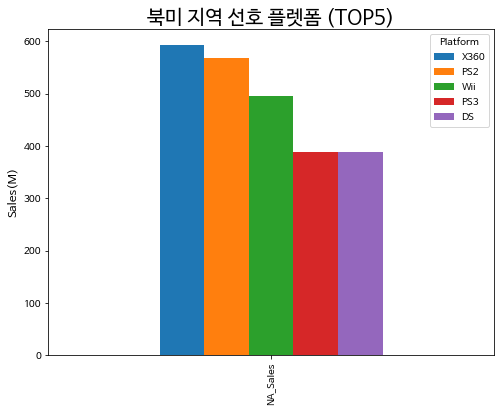

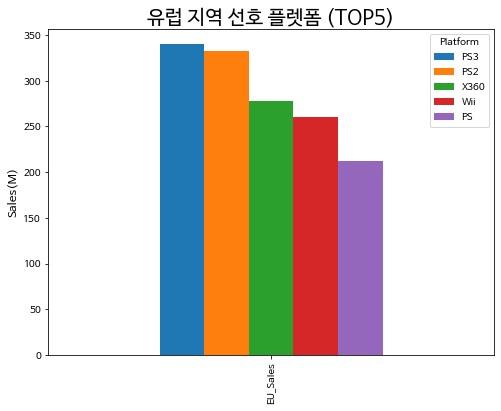

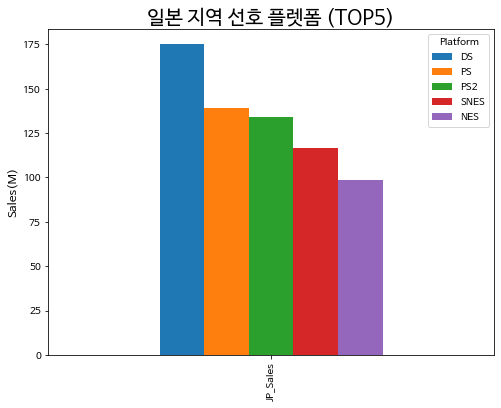

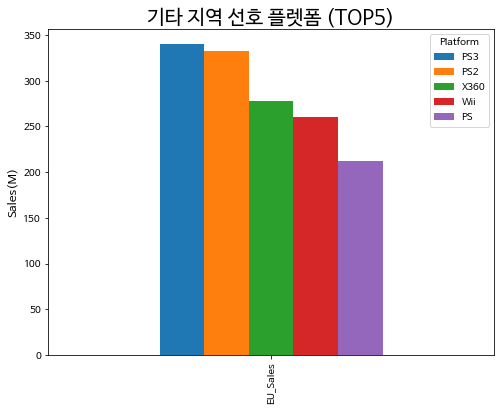

In [20]:
pgd = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

nap = pgd[['Platform','NA_Sales']].groupby('Platform').sum()
nap = nap.nlargest(5, 'NA_Sales', keep='first')
nap.T.plot(kind = 'bar', figsize=(8, 6))
plt.title('북미 지역 선호 플렛폼 (TOP5)', size=20)
plt.ylabel('Sales(M)', size=12)


eup = pgd[['Platform','EU_Sales']].groupby('Platform').sum()
eup = eup.nlargest(5, 'EU_Sales', keep='first')
eup.T.plot(kind = 'bar', figsize=(8, 6))
plt.title('유럽 지역 선호 플렛폼 (TOP5)', size=20)
plt.ylabel('Sales(M)', size=12)


jpp = pgd[['Platform','JP_Sales']].groupby('Platform').sum()
jpp = jpp.nlargest(5, 'JP_Sales', keep='first')
jpp.T.plot(kind = 'bar', figsize=(8, 6))
plt.title('일본 지역 선호 플렛폼 (TOP5)', size=20)
plt.ylabel('Sales(M)', size=12)


otp = pgd[['Platform','EU_Sales']].groupby('Platform').sum()
otp = otp.nlargest(5, 'EU_Sales', keep='first')
otp.T.plot(kind = 'bar', figsize=(8, 6))
plt.title('기타 지역 선호 플렛폼 (TOP5)', size=20)
plt.ylabel('Sales(M)', size=12)

In [21]:
#장르 총합
genre_total = ag.groupby('Genre').sum().sum(axis=1)
#플렛폼 총합
platform_total = pgd.groupby('Platform').sum().sum(axis=1)

# flatform_total_top10 = flatform_total.nlargest(5, 'Platform')
# flatform_total_top10

In [22]:
p_total_top5 = platform_total.sort_values(ascending=False)[:5]

Text(0.5, 1.0, '장르별 총 판매량')

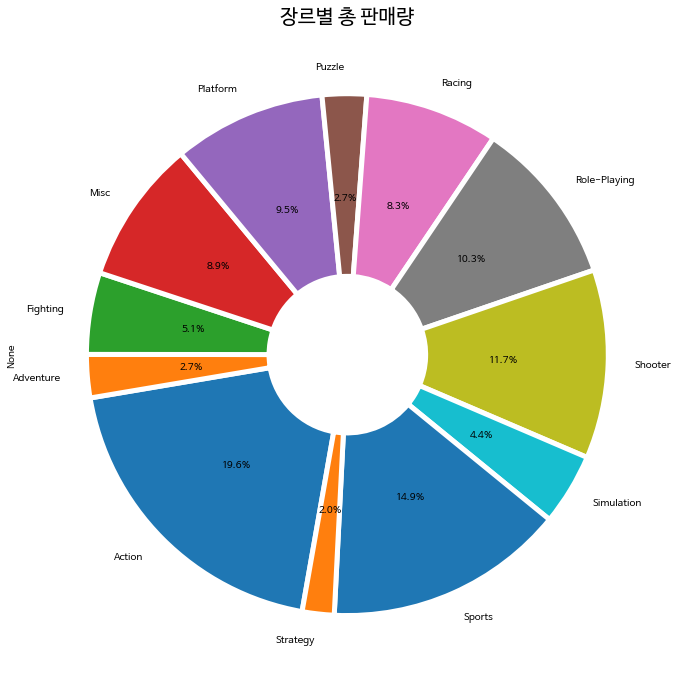

In [23]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

genre_total.plot(kind='pie', figsize=(12,12), autopct='%.1f%%',startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.title('장르별 총 판매량', size=20)


Text(0.5, 1.0, '플렛폼 총 판매량 (top5)')

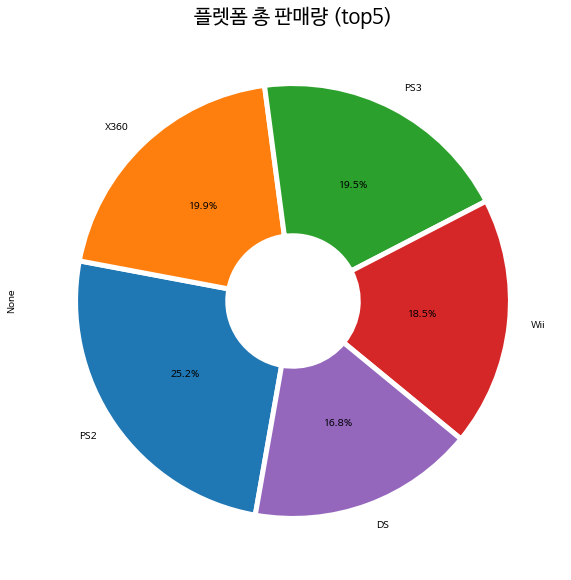

In [24]:
p_total_top5.plot(kind='pie', figsize=(12,10), autopct='%.1f%%',startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.title('플렛폼 총 판매량 (top5)', size=20)


**시계열 예측 모델(ARIMA)를 통한 추후 판매량 예측**

In [28]:
# Year도 칼럼으로 변경

# yg1 = yg.drop(yg.index[0])
# yg1 = yg1.rename_axis('Year').reset_index()
# yg1.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1981,33.40,1.96,0.00,0.32
1,1982,26.92,1.65,0.00,0.31
2,1983,7.76,0.80,8.10,0.14
3,1984,33.28,2.10,14.27,0.70
4,1985,33.73,4.74,14.56,0.92


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


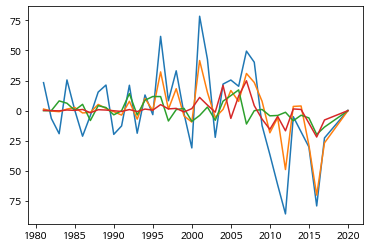

In [34]:
# diff1 = yg['NA_Sales'].diff()
# diff2 = yg['EU_Sales'].diff()
# diff3 = yg['JP_Sales'].diff()
# diff4 = yg['Other_Sales'].diff()

# plt.plot(diff1)
# plt.plot(diff2)
# plt.plot(diff3)
# plt.plot(diff4)

In [36]:
# from statsmodels.tsa.arima_model import ARIMA
# import statsmodels.api as sm

# model = ARIMA(yg['NA_Sales'], order = (1, 2, 0))
# model_fit = model.fit(trend = 'c', full_output = True, disp = True)
# print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D2.NA_Sales   No. Observations:                   37
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -186.751
Method:                       css-mle   S.D. of innovations             37.599
Date:                Wed, 06 Jul 2022   AIC                            379.503
Time:                        20:20:43   BIC                            384.336
Sample:                             2   HQIC                           381.207
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5850      4.729     -0.124      0.902      -9.854       8.685
ar.L1.D2.NA_Sales    -0.3155      0.155     -2.035      0.050      -0.619      -0.012
                        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 432x288 with 0 Axes>

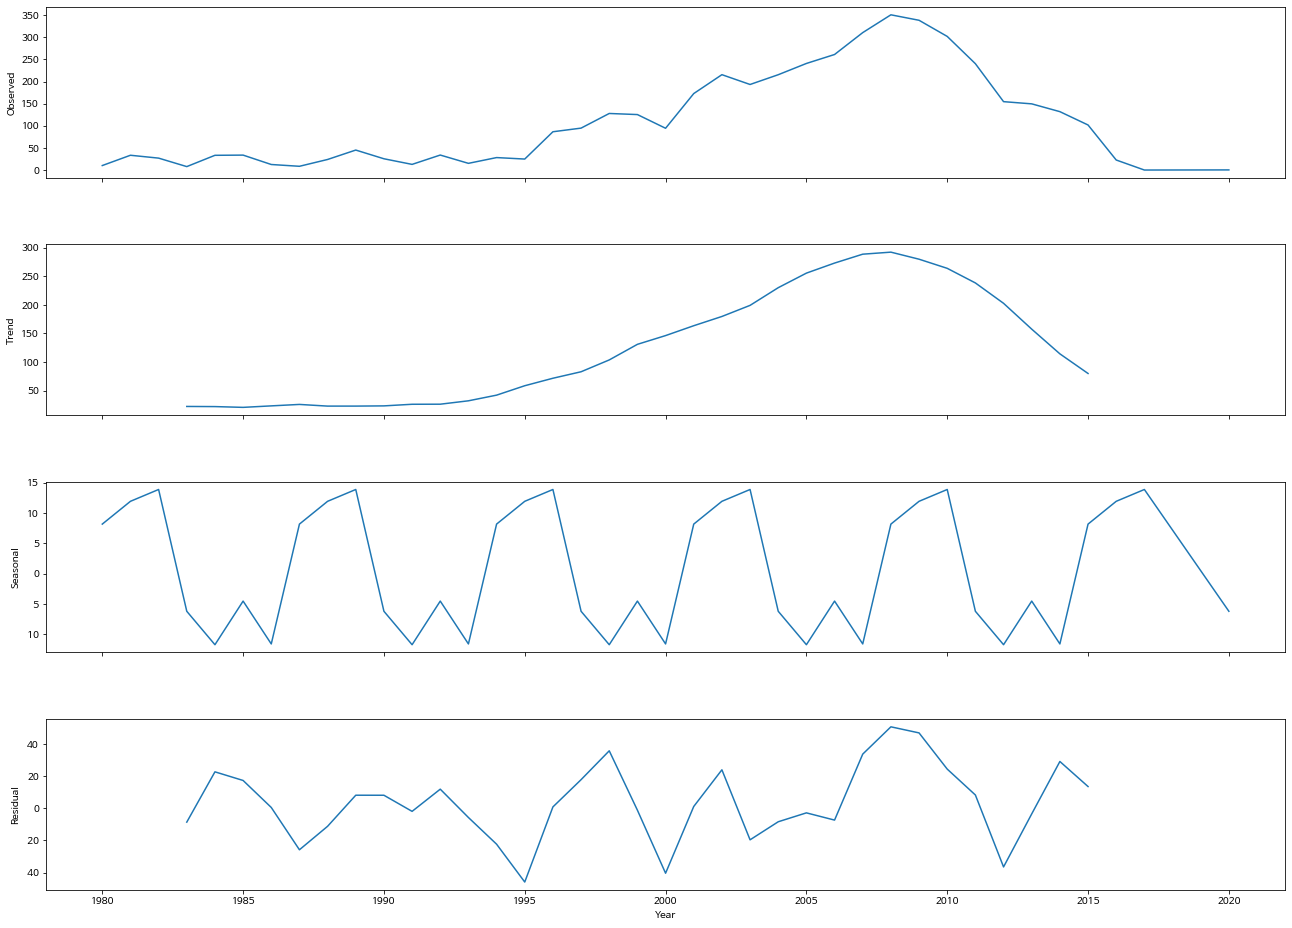

In [33]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(yg['NA_Sales'],
#                             model = 'additive', freq=7)

# fig = plt.figure()
# fig = result.plot()
# fig.set_size_inches(20,15)

In [29]:
# from statsmodels.tsa.stattools import adfuller
# result = adfuller(diff1[1:])
# print(result[0])
# print(result[1])
# for key, value in result[4].items():
#   print(key, value)

-4.155166169768064
0.0007839977434349198
1% -3.6209175221605827
5% -2.9435394610388332
10% -2.6104002410518627
